# PDF to text converter 

In [5]:
from collections import Counter
from __future__ import division
from io import StringIO
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
import os
import sys, getopt
import pandas as pd
import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import random

from wordcloud import WordCloud, STOPWORDS



In [12]:

#converts pdf, returns its text content as a string
def convert(fname, pages=None):
    if not pages:
        pagenums = set()
    else:
        pagenums = set(pages)

    output = StringIO()
    manager = PDFResourceManager()
    converter = TextConverter(manager, output, laparams=LAParams())
    interpreter = PDFPageInterpreter(manager, converter)

    infile = open(fname, 'rb')
    for page in PDFPage.get_pages(infile, pagenums):
        interpreter.process_page(page)
    infile.close()
    converter.close()
    text_c = output.getvalue()
    output.close
    return(text_c)

# Wordcloud Function

This is the output of the project, a word cloud so that users can visually see the difference between their own CV and someone else's. 

In [17]:
def wordcloud_pdf(text):
    import numpy as np
    from PIL import Image
    from os import path
    import matplotlib.pyplot as plt
    import random

    from wordcloud import WordCloud, STOPWORDS


    def grey_color_func(word, font_size, position, orientation, random_state=None,
                        **kwargs):
        return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

    

    text = text


    
    # adding script specific stopwords
    stopwords = set(STOPWORDS)
    stopwords.add("int")
    stopwords.add("ext")

    wc = WordCloud(max_words=1000,
                   #mask=mask,
                   stopwords=stopwords, margin=10,
                   random_state=13).generate(text)
    
    default_colors = wc.to_array()
   
    plt.figure()
    plt.title("Word Cloud")
    plt.imshow(default_colors, interpolation="bilinear")
    plt.axis("off")
    a = plt.show()
    return(a)

# Analysis functions

In [30]:
#pdf_file = cv in pdf 
#text_c = convert(pdf_file)

def graphs_pdf(text_c):
    %pylab inline
    import re
    import math
    import string
    
    def words(text): return re.findall(r'\w+', text.lower()) #word bag

    text = words(text_c)
    from nltk.corpus import stopwords
    stop = set(stopwords.words('english'))
    filter_text = [i for i in text if i not in stop] # not in stop
    filter_text = [i for i in filter_text if not i.isdigit()]
    WORDS = Counter(filter_text)
    top_words = WORDS.most_common(15) 
    import pandas as pd
    word = [i[0] for i in top_words]
    count = [i[1] for i in top_words]
    df = pd.DataFrame({'words' : word,'count' :count})
        #df plot 
    #filter_text = splitNet()
    import matplotlib as plt

    my_plot = df.plot(kind='bar', color = "blue")
    my_plot.set_xticklabels(word,rotation=90)
    my_plot.set_title("Your Top Words")
    plt.style.use("ggplot")
    #plt.show()

# Keyword match

A measure used to show the % of keywords (based on a pre-composed set of keywords - highly customizable) in my CV 

In [44]:
keywords = ['Data', 'Science', 'Analytical', 'Machine', 'Learning', 
            'Developer', 'strong', 'tolerance', 'ambiguity', 'driven', 'refined', 'alertness', 'abilities.', 'work', 'experience:', 'tree', 'experience',
            'areas', 'expertise:', 'machine', 'learning', 'r,', 'python', 'natural'
             'Hadoop']

def keyword_match(filter_text):
    def words(text): return re.findall(r'\w+', text.lower()) #word bag

    %pylab inline
    import re
    import math
    import string
    text = words(text_c)
    from nltk.corpus import stopwords
    stop = set(stopwords.words('english'))
    filter_text = [i for i in text if i not in stop] # not in stop
    filter_text = [i for i in filter_text if not i.isdigit()]

    length = len(keywords)

    not_in_keywords = len([i for i in keywords if i not in set(filter_text)])


    percentage_key = not_in_keywords/length
    missing = 1-percentage_key

    percentages = [percentage_key, missing]
    #percentages = pd.Series(percentage_key, missing)
    labels = ["Missing", "Your percentage"]
    df2 = pd.DataFrame({'Labels' : labels ,'Values' : percentages})
    occ_plot = df2.plot(kind='bar', stacked=True,
                                colormap='Paired',
                                title="Keyword Match")
    occ_plot.set_xticklabels('Values')
    #occ_plot.ylabel('Values')
    #plt.ylabel('y')
    occ_plot.set_xticklabels(["Key word match","Missing"],rotation=90)

# TEST 

This is a demonstration using my own CV.

In [13]:
text_c = convert("CV-Filippo-Frezza.pdf")

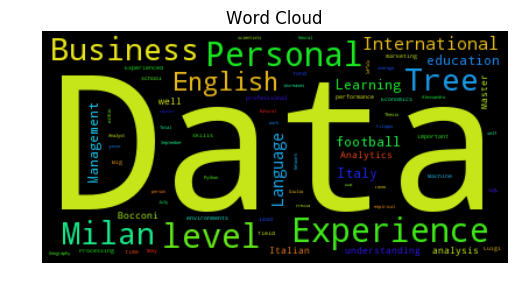

In [18]:
wordcloud_pdf(text_c)

# My Top Words:

Populating the interactive namespace from numpy and matplotlib


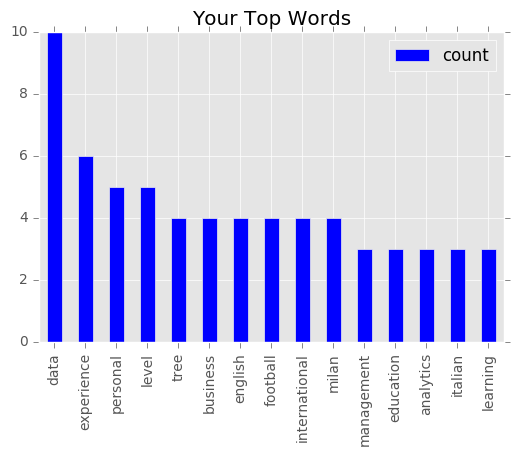

In [31]:
graphs_pdf(text_c)

# Key Word Match:

Populating the interactive namespace from numpy and matplotlib


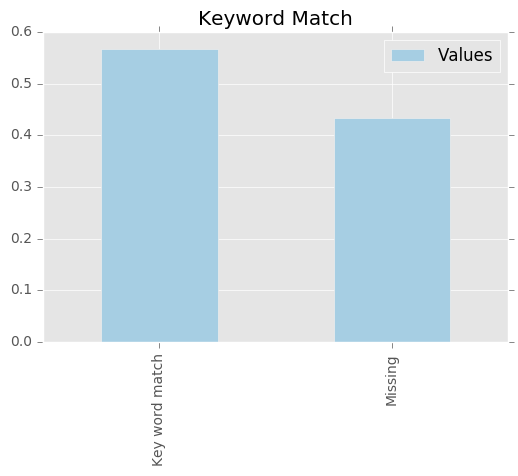

In [45]:
keyword_match(text_c)